In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import deepwave
import h5py
from pathlib import Path

from einops.array_api import rearrange

from utils import *
from einops import rearrange
from omegaconf import OmegaConf
from scipy.ndimage import gaussian_filter


from utils import make_and_load_model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 设置config路径

In [4]:
config_path = "./config/template.yaml"
cfg = OmegaConf.load(config_path)

# 可视化训练阶段损失

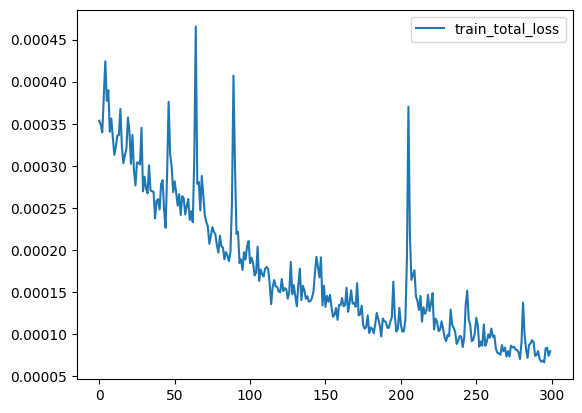

In [11]:
if cfg.generate_par.type == "FWI":
    pass
elif cfg.generate_par.type in ["UNet","CAE",]:
    train_log_path = cfg.generate_par.train_log_path
    with h5py.File(train_log_path,"r") as f:
                data = f["train_total_loss"][200:]
                plt.plot(data, label="train_total_loss")
                plt.legend()
else:
    train_log_path = cfg.generate_par.train_log_path
    with h5py.File(train_log_path,"r") as f:
        data = f["train_mse_loss"][200:]
        plt.plot(data, label="train_mse_loss")
        plt.legend()


# 可视化自编码器效果

模型已经成功加载。


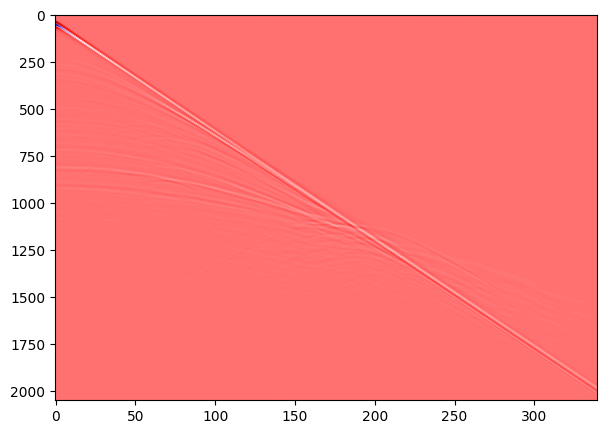

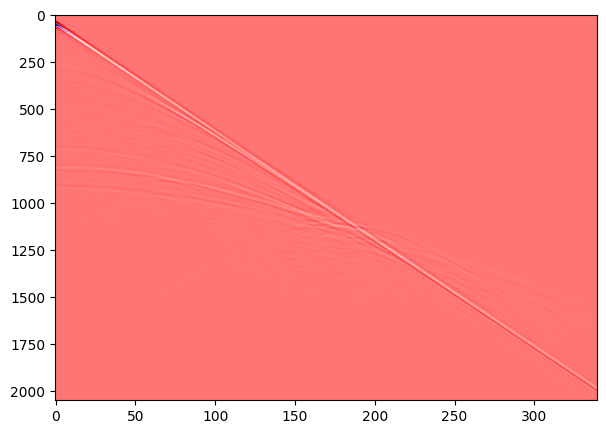

In [194]:
shot_index = 0
model = make_and_load_model(cfg)
model.eval()
obs_signal = np.load(cfg.generate_par.obs_signal_path)[shot_index,:,:]
obs_signal = obs_signal / np.max(np.abs(obs_signal))
input_obs_signal = rearrange(torch.from_numpy(obs_signal).float().to(device),"r t -> r 1 t")
output_obs_signal = model.forward(input_obs_signal)["re_signal"]
re_obs_signal = rearrange(output_obs_signal,"r 1 t -> r t").detach().cpu().numpy()

plt.figure(figsize=(7,5))
plt.imshow(obs_signal.T /1e3,aspect="auto",cmap='seismic')
plt.show()
plt.figure(figsize=(7,5))
plt.imshow(re_obs_signal.T / 1e3,aspect="auto",cmap='seismic')
plt.show()


# 可视化反演阶段损失

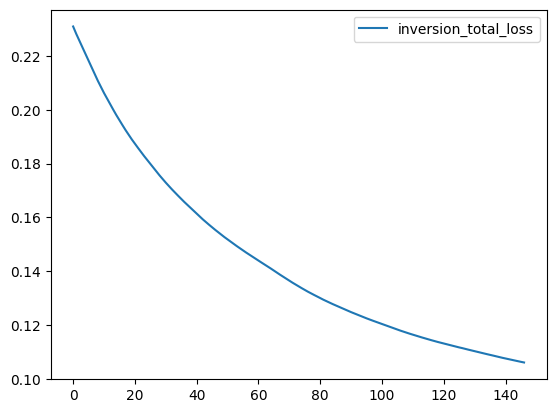

In [8]:
inversion_log_path = cfg.generate_par.inversion_log_path
with h5py.File(inversion_log_path,"r") as f:
        data = f["inversion_total_loss"][:]
        plt.plot(data, label="inversion_total_loss")
        plt.legend()


# 可视化反演结果

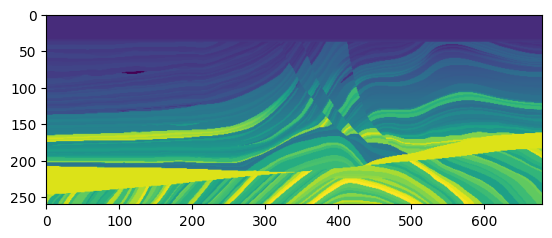

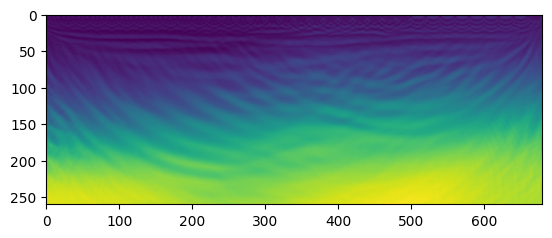

In [10]:
vp_true = np.load(cfg.forward_par.vp_true_path)
plt.imshow(vp_true.T)
plt.show()
inversion_log_path = cfg.generate_par.inversion_log_path
with h5py.File(inversion_log_path,"r") as f:
        data = f["vp_inv"][-1]
        plt.imshow(data.T)
        plt.show()
